In [1]:
from pv_analyzer import pv_analyze
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib widget

In [3]:
def emp_kep_v(v_rot, v_100):        
        r_au = 100.*np.power(v_100/v_rot, 2)
        return r_au

def emp_kep_r(r, r_b, v_100):
        v_r = v_100*(r/r_b)**(-0.5)
        return v_r

In [4]:
# define fix r points
# Get equidistance points

r_au_empkep_rs_fix_r = np.arange(start=42., step=42., stop=840.)
r_au_empkep_bs_fix_r = -r_au_empkep_rs_fix_r

v_100 = 2.842 #kmps # idpft-2.674 # JS- 3.2 # newft 2.842

v_rot_empkep_rs_fix_r =  emp_kep_r(r=r_au_empkep_rs_fix_r, r_b=100., v_100=v_100)
v_rot_empkep_bs_fix_r = - v_rot_empkep_rs_fix_r

plot_points = [r_au_empkep_rs_fix_r, v_rot_empkep_rs_fix_r, r_au_empkep_bs_fix_r, v_rot_empkep_bs_fix_r]

In [5]:
# Evaluate empirical keplerian curve function
r_rs_func = np.arange(start=1., step=0.5, stop=840.)   # Note that this is in AU
v_rs_func = emp_kep_r(r=r_rs_func, r_b=100., v_100=v_100)

r_bs_func = -r_rs_func
v_bs_func = -v_rs_func

In [6]:
pv_without_beam_fname = "L1489irs_model_i_73.0without_beam_conv_pv.fits"

pv_with_beam_fname = "L1489irs_model_i_73.0with_beam_conv_pv.fits"

pv_with_beam = pv_analyze(pv_path=pv_with_beam_fname,
                    is_Tb=False, v_sys=7.375) # V_sys - 7.22, 7.27 7.33
pv_with_beam.read_pv(print_details = True)

Tb_pv_with_beam = pv_with_beam.get_tb_on_curve(curve_function = plot_points, 
                            get_surrounding_pix = False, mode='vals',
                            num_pix = 3)


pv_without_beam = pv_analyze(pv_path=pv_without_beam_fname,
                    is_Tb=False, v_sys=7.375) # V_sys - 7.22, 7.27 7.33
pv_without_beam.read_pv(print_details = True)

Tb_pv_without_beam = pv_without_beam.get_tb_on_curve(curve_function = plot_points, 
                            get_surrounding_pix = False, mode='vals',
                            num_pix = 3)

Convert frequency to velocity
 rms = 1.14e-11 Jy beam$^-1$
Convert frequency to velocity
 rms = 5.28e-18 Jy beam$^-1$


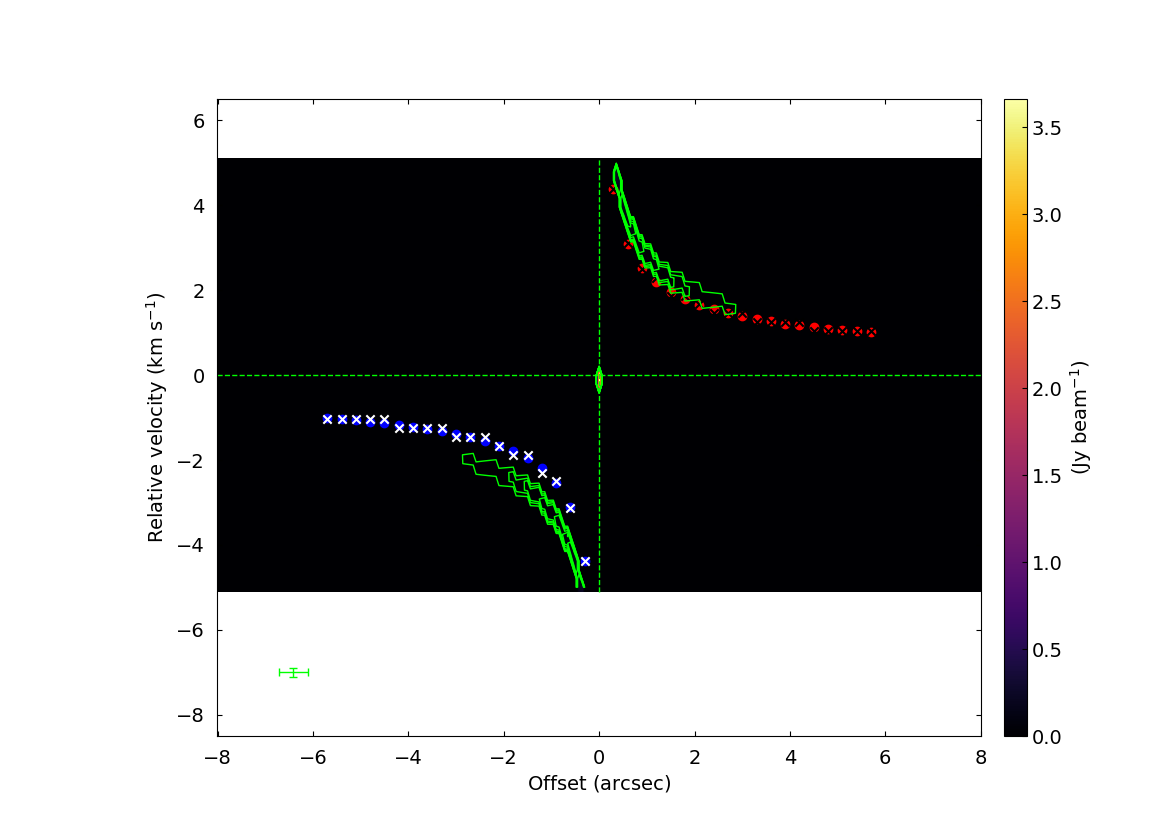

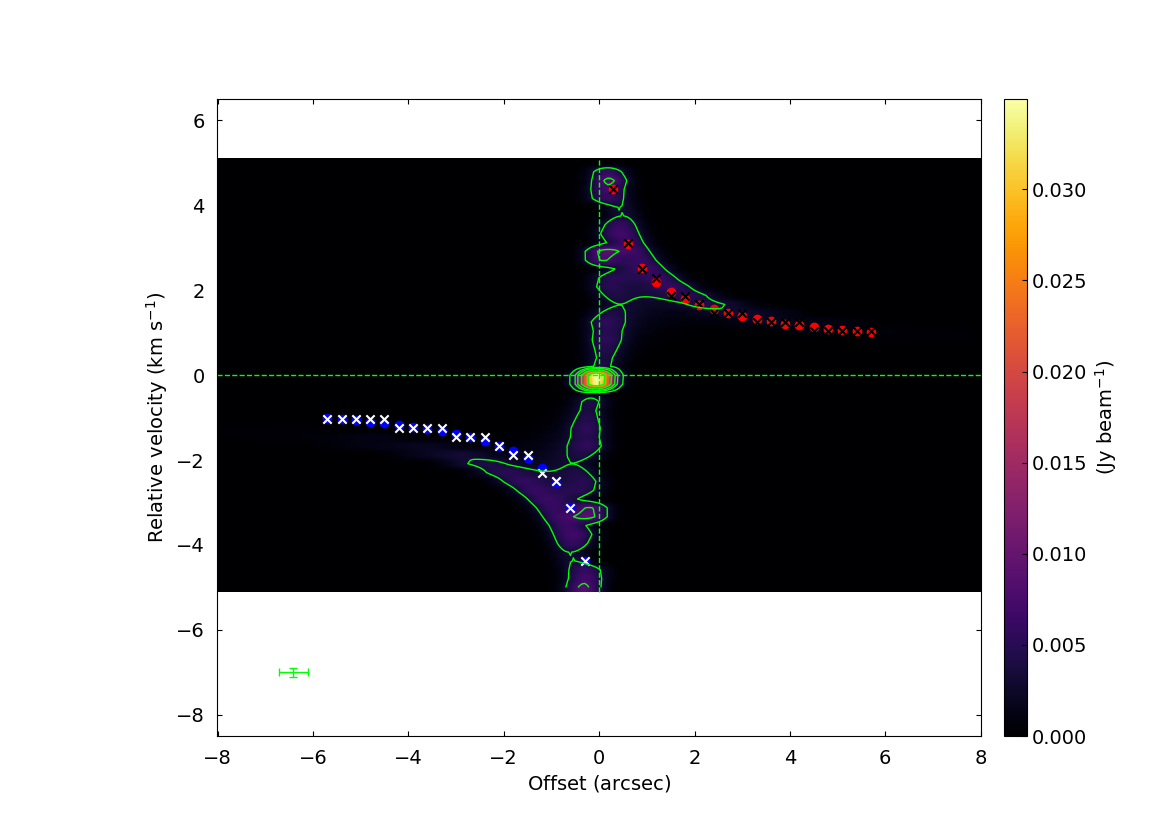

In [9]:
pv_without_beam_fig = pv_without_beam.plot_pv(plot_curve=True, base_ctr_lvl= 0.002)
pv_with_beam_fig = pv_with_beam.plot_pv(plot_curve=True, base_ctr_lvl= 0.0011)

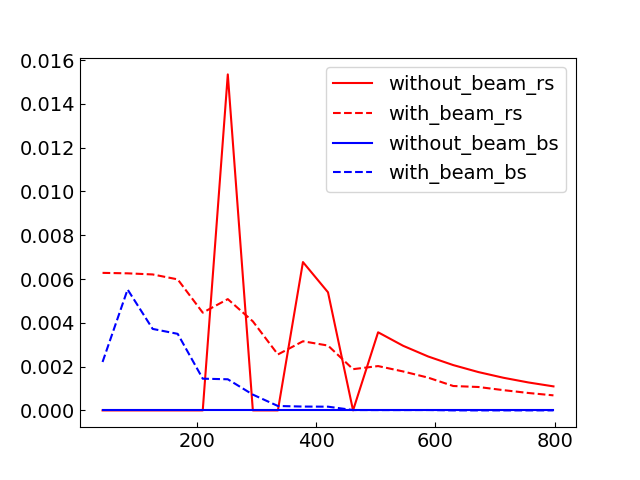

In [8]:
fig, axs = plt.subplots()

axs.plot(r_au_empkep_rs_fix_r, Tb_pv_without_beam["Tb_on_point_rs"], label='without_beam_rs', c='r', ls = '-')
axs.plot(r_au_empkep_rs_fix_r, Tb_pv_with_beam["Tb_on_point_rs"], label='with_beam_rs', c='r', ls = '--')

axs.plot(-r_au_empkep_bs_fix_r, Tb_pv_without_beam["Tb_on_point_bs"], label='without_beam_bs', c='b', ls = '-')
axs.plot(-r_au_empkep_bs_fix_r, Tb_pv_with_beam["Tb_on_point_bs"], label='with_beam_bs', c='b', ls = '--')
axs.legend()
plt.show()